<a href="https://colab.research.google.com/github/zainabasif747/OnlineComplaintSystem/blob/main/Facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python
!pip install dlib


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload an image file
image_path = list(uploaded.keys())[0]  # Get the uploaded file's name


Saving people.jpg to people.jpg


[INFO] Face detection took 0.2347 seconds


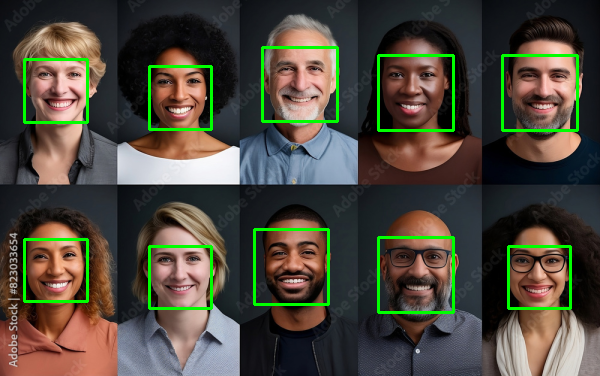

In [ ]:
import imutils
import time
import dlib
import cv2
from google.colab.patches import cv2_imshow

def convert_and_trim_bb(image, rect):
    startX = rect.left()
    startY = rect.top()
    endX = rect.right()
    endY = rect.bottom()

    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(endX, image.shape[1])
    endY = min(endY, image.shape[0])

    w = endX - startX
    h = endY - startY
    return (startX, startY, w, h)

# Number of times to upsample
upsample = 1

# Load the input image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image not found at path: {image_path}")

# Resize the image for easier processing
image = imutils.resize(image, width=600)

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Perform face detection
start = time.time()
rects = detector(image, upsample)
end = time.time()

print(f"[INFO] Face detection took {end - start:.4f} seconds")

# Draw bounding boxes around detected faces
for rect in rects:
    (x, y, w, h) = convert_and_trim_bb(image, rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the output image
cv2_imshow(image)
